In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import tqdm.notebook as tq
import scipy.cluster.hierarchy as spc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.feature_selection import VarianceThreshold

In [2]:
train_df = pd.read_csv("train_df_renamed.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train_df.head())

,Household level identifier,Id,Monthly rent payment,=1 Overcrowding by bedrooms,number of all rooms in the house,=1 Overcrowding by rooms,=1 has toilet in the household,=1 if the household has refrigerator,owns a tablet,number of tablets household owns,Males younger than 12 years of age,Males 12 years of age and older,Total males in the household,Females younger than 12 years of age,Females 12 years of age and older,Total females in the household,persons younger than 12 years of age,persons 12 years of age and older,Total persons in the household,size of the household,TamViv,years of schooling,Years behind in school,household size,=1 if predominant material on the outside wall is block or brick,"=1 if predominant material on the outside wall is socket (wood, zinc or absbesto",=1 if predominant material on the outside wall is prefabricated or cement,=1 if predominant material on the outside wall is waste material,=1 if predominant material on the outside wall is wood,=1 if predominant material on the outside wall is zink,=1 if predominant material on the outside wall is natural fibers,=1 if predominant material on the outside wall is other,"=1 if predominant material on the floor is mosaic, ceramic, terrazo",=1 if predominant material on the floor is cement,=1 if predominant material on the floor is other,=1 if predominant material on the floor is natural material,=1 if no floor at the household,=1 if predominant material on the floor is wood,=1 if predominant material on the roof is metal foil or zink,"=1 if predominant material on the roof is fiber cement, mezzanine",=1 if predominant material on the roof is natural fibers,=1 if predominant material on the roof is other,=1 if the house has ceiling,=1 if water provision inside the dwelling,=1 if water provision outside the dwelling,=1 if no water provision,"=1 electricity from CNFL, ICE, ESPH/JASEC",=1 electricity from private plant,=1 no electricity in the dwelling,=1 electricity from cooperative,=1 no toilet in the dwelling,=1 toilet connected to sewer or cesspool,=1 toilet connected to septic tank,=1 toilet connected to black hole or letrine,=1 toilet connected to other system,=1 no main source of energy used for cooking (no kitchen),=1 main source of energy used for cooking electricity,=1 main source of energy used for cooking gas,=1 main source of energy used for cooking wood charcoal,=1 if rubbish disposal mainly by tanker truck,=1 if rubbish disposal mainly by botan hollow or buried,=1 if rubbish disposal mainly by burning,=1 if rubbish disposal mainly by throwing in an unoccupied space,=1 if rubbish disposal mainly other,=1 if walls are bad,=1 if walls are regular,=1 if walls are good,=1 if roof are bad,=1 if roof are regular,=1 if roof are good,=1 if floor are bad,=1 if floor are regular,=1 if floor are good,=1 if disable person,=1 if male,=1 if female,=1 if less than 10 years old,=1 if free or coupled uunion,=1 if married,=1 if divorced,=1 if separated,=1 if widow/er,=1 if single,=1 if household head,=1 if spouse/partner,=1 if son/doughter,=1 if stepson/doughter,=1 if son/doughter in law,=1 if grandson/doughter,=1 if mother/father,=1 if father/mother in law,=1 if brother/sister,=1 if brother/sister in law,=1 if other family member,=1 if other non family member,Number of children 0 to 19 in household,Number of adults in household,# of individuals 65+ in the household,# of total individuals in the household,Dependency rate,years of education of male head of household,years of education of female head of household,average years of education for adults (18+),=1 no level of education,=1 incomplete primary,=1 complete primary,=1 incomplete academic secondary level,=1 complete academic secondary level,=1 incomplete technical secondary level,=1 complete technical secondary level,=1 undergraduate and higher education,=1 postgraduate higher education,number of bedrooms,# persons per room,=1 own and fully paid house,"=1 own, paying in installments",=1 rented,=1 precarious,"=1 o

In [3]:
def calc_na(data):
    data_na = data.isnull().sum().values / data.shape[0] *100
    df_na = pd.DataFrame(data_na, index=data.columns, columns=['Count'])
    df_na = df_na.sort_values(by=['Count'], ascending=False)

    missing_value_count = df_na[df_na['Count']>0].shape[0]

    print(df_na.head(6))
calc_na(train_df)
# ensure that there are no nan values

                                         Count
Household level identifier                 0.0
# of total individuals in the household    0.0
=1 if brother/sister in law                0.0
=1 if other family member                  0.0
=1 if other non family member              0.0
Number of children 0 to 19 in household    0.0


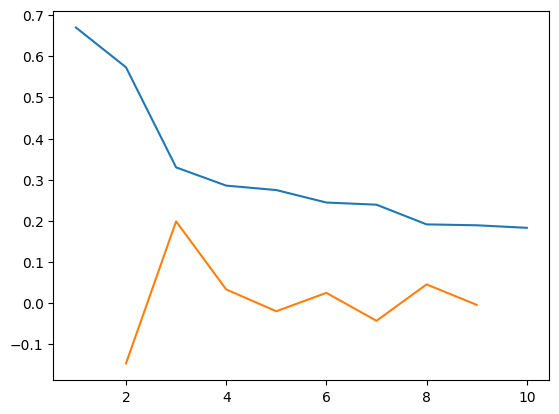

clusters: 3


In [4]:
to_cluster_df = train_df.iloc[:,3:-1]
to_cluster_df.head()
Z = linkage(to_cluster_df, 'average', 'correlation')

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

Clusters = 3